/home/gabriel/Documents/Uni/Sandpiles/Code/analysis.py:65: RuntimeWarning: divide by zero encountered in power
  return np.exp(n.nominal_value) * x**m.nominal_value


,dimension,grid,relax,tau,alpha,lambda,gamma1,1/gamma1,gamma2,1/gamma2,gamma3,1/gamma3
0,2,40,op co,2.329+/-0.028,2.314+/-0.017,2.13+/-0.07,1.4557+/-0.0033,0.6526+/-0.0011,1.775+/-0.028,0.5353+/-0.0026,1.156+/-0.011,0.833+/-0.010


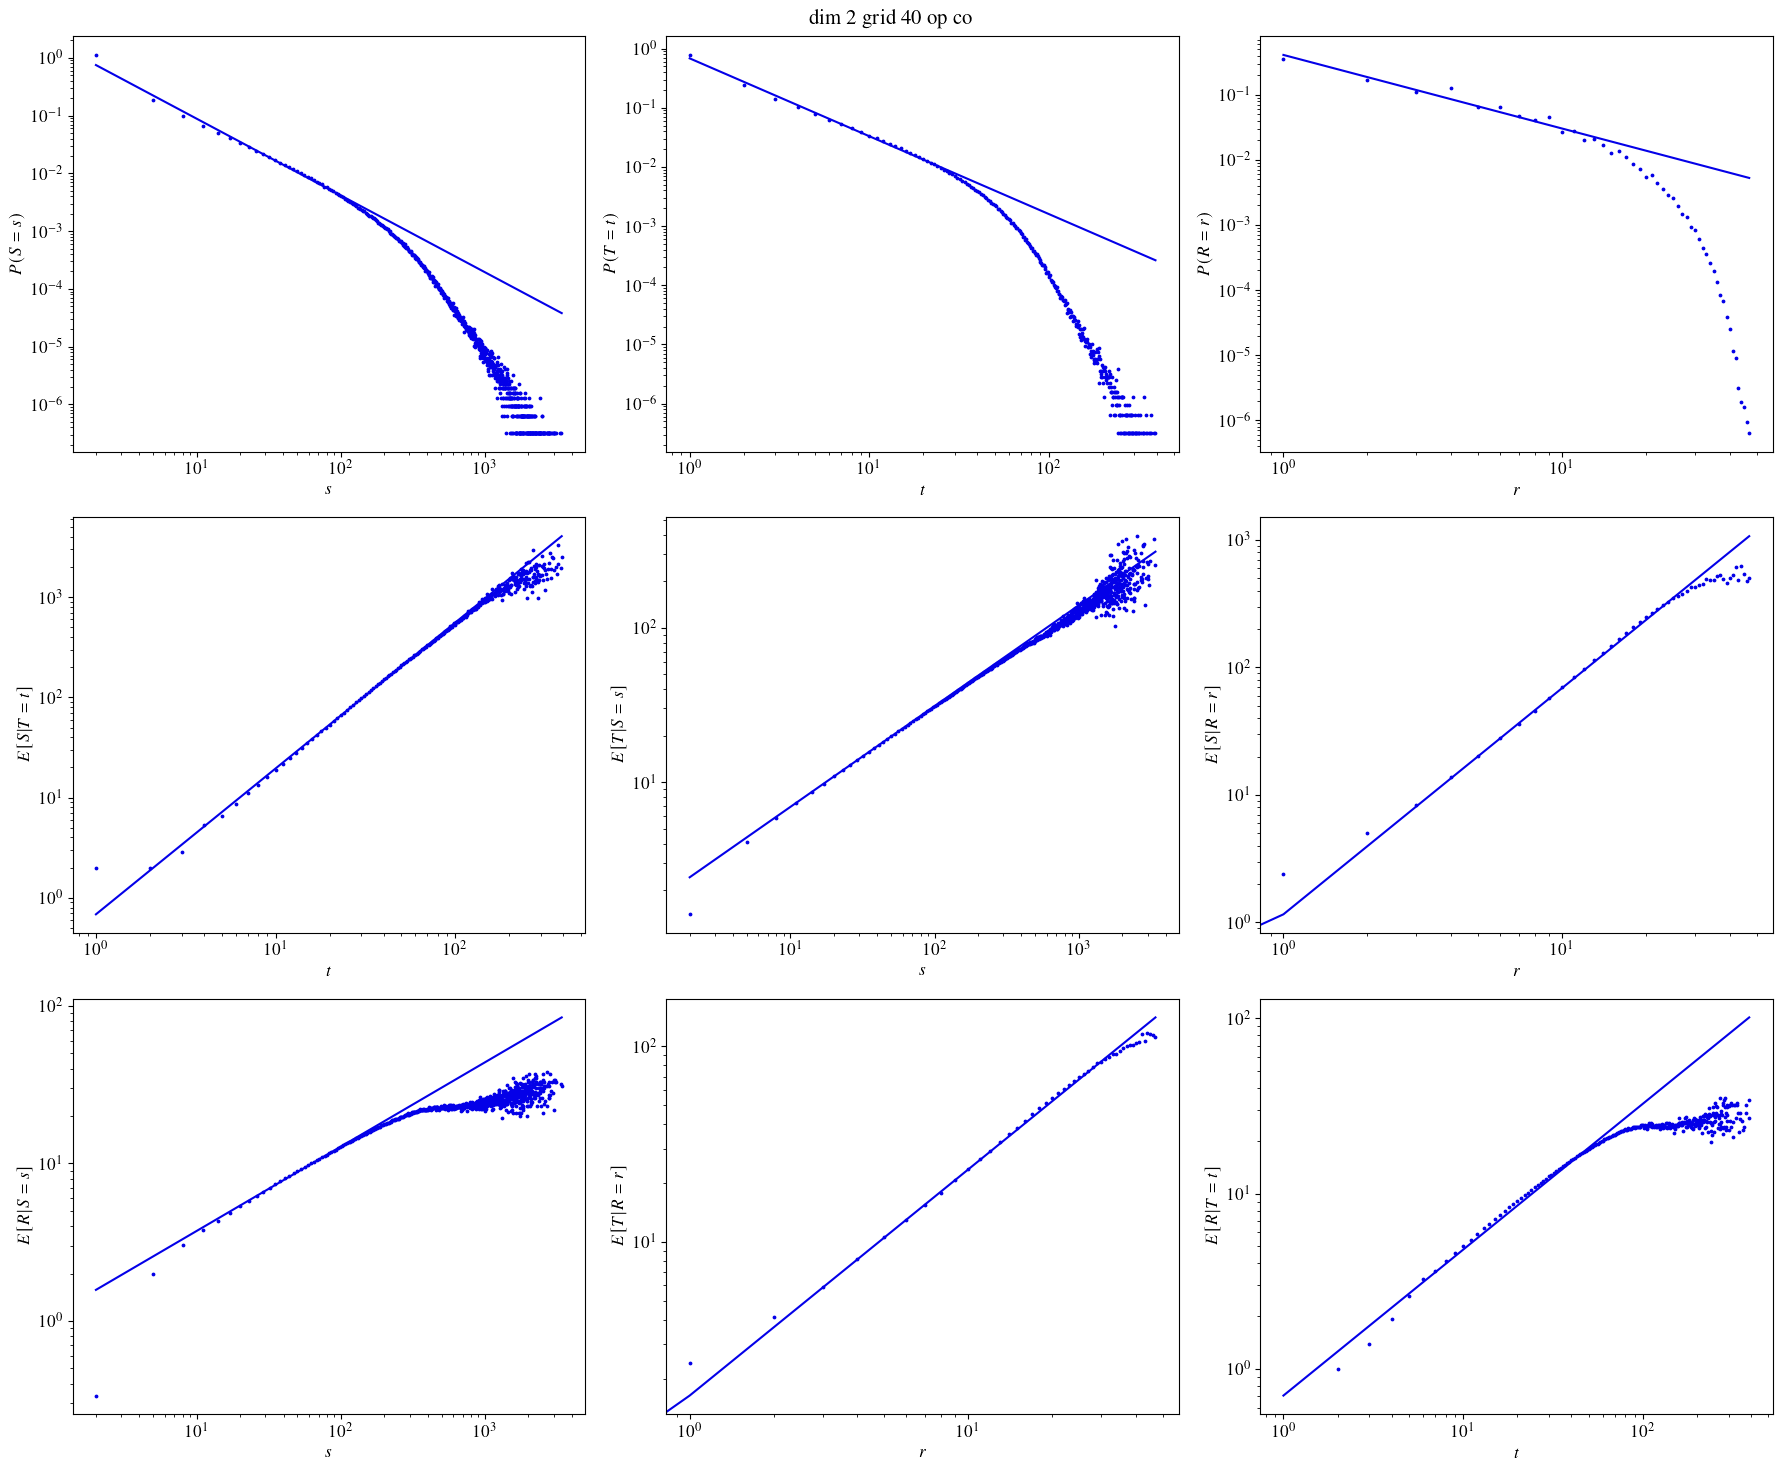

In [3]:
import matplotlib.pyplot as plt

from analysis import plot_scaling_exponents
from computation import *
import json
import pathlib
import pandas as pd

fig, ax = plt.subplots(3,3, figsize=(18, 15))
data_dir = pathlib.Path("data")
with open("scaling_exponents.json", "r") as f:
    meta = json.load(f)

# if specified, calculate scaling exponents for only one data set
do_plot = False
if isinstance(meta[0], int):
    meta = [meta[meta[0]]]
    do_plot = True

df = pd.DataFrame()
for m in meta:
    if not (data_dir / m["path"] / "avalanche_distribution.npz").exists():
        print(f"no avalanche distribution for {m['path']}")
        continue
    (s, t, r), bins = load_3d_dist(data_dir / m["path"] / "avalanche_distribution.npz")
    fig.suptitle(m["label"])
    _df = plot_scaling_exponents(s, t, r, bins, ax, pathlib.Path(m["path"]).name,
                                m.get("limits", None), do_plot)
    df = pd.concat([df, _df])
df

In [56]:
import uncertainties as unc
df.query("grid != 5 and relax == 'cl nco'", inplace=True)
df = df.map(lambda x: "{:.2uS}".format(x) if isinstance(x, unc.core.AffineScalarFunc) else x)
df_new = df.sort_values(["dimension", "grid"]).set_index(["dimension", "grid"])
# df_new.reset_index(level='relax', inplace=True)
# df_new.drop("relax", axis=0, inplace=True)
# df_new["relax"]
# df_new.drop("relax", inplace=True)
df_new


relax         tau       alpha     lambda      gamma1  \
dimension grid                                                          
2         10    cl nco   2.042(19)   1.936(29)   1.66(40)  1.4713(87)   
          20    cl nco  2.0026(33)   1.924(12)   1.53(37)  1.4908(56)   
          40    cl nco   2.067(23)  1.9722(71)  1.725(53)  1.5727(15)   
3         10    cl nco   2.499(11)   2.556(23)   2.31(30)  1.5764(80)   
          20    cl nco  2.3827(58)   2.448(14)   2.22(17)  1.6756(31)   
4         15    cl nco   2.659(15)   2.468(37)   2.81(13)  1.7162(75)   

                  1/gamma1     gamma2    1/gamma2     gamma3    1/gamma3  
dimension grid                                                            
2         10    0.6646(20)  1.544(79)   0.596(11)  0.932(66)   0.958(47)  
          20    0.6653(13)  1.807(22)  0.5850(41)  1.075(40)   1.010(51)  
          40    0.6544(16)  1.835(35)  0.4680(40)  1.177(13)  0.8570(70)  
3         10    0.6084(28)   1.82(12)  0.4978(67)  1.228(43)   0.744(16)  
          20    0.6216(34)   1.80(11)  0.4260(29)  1.220(45)  0.7520(98)  
4         15    0.5377(89)   2.15(10)  0.3500(39)  1.338(43)  0.6214(61)